In [1]:
import os
from ordereddict import OrderedDict
os.environ['THEANO_FLAGS']="device=cpu"

from utils import tile_raster_images
from pylearn2.utils import serial
import theano
import theano.tensor as T

try:
    import PIL.Image as Image
except ImportError:
    import Image
import IPython.display as I

In [6]:
DIR_DATA = '/Users/vmisra/data/'
dir_model_AE = os.path.join(DIR_DATA,'AE_experiments/models')
dir_model_CAN = os.path.join(DIR_DATA,'CAN_experiments/models')
dir_fuel = os.path.join(DIR_DATA,'AE_experiments/fuel')

#Load models and data

In [7]:
test_data = serial.load(os.path.join(dir_fuel,'mnist_test_X.pkl'))

In [12]:
model_names = ['CAN_C1','D17']
def model_pathmapper(model_name):
    if model_name.startswith('CAN'):
        testpath = os.path.join(dir_model_CAN,model_name,model_name+'.pkl.cmp')
        return testpath
    else:
        testpath_1 = os.path.join(dir_model_AE,model_name,'finetune.pkl')
        testpath_2 = os.path.join(dir_model_AE,model_name,'solotrain.pkl')
        if os.path.exists(testpath_1):
            return testpath_1
        else:
            return testpath_2

In [18]:
models = OrderedDict()
xhats = OrderedDict()
for model_path,model_name in zip(map(model_pathmapper,model_names),model_names):
    model = serial.load(model_path)
    models[model_name] = model 
    X = model.get_input_space().make_theano_batch()
    Y = model.reconstruct(X)
    xhats[model_name] = Y.eval({X:test_data[:200,:]})

Using gpu device 0: GeForce GT 650M


##visualize outputs

original


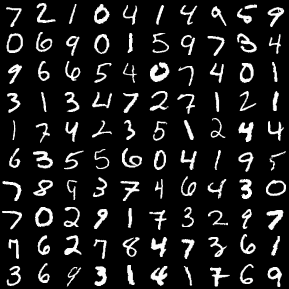

In [19]:
original_img = Image.fromarray(tile_raster_images(X=test_data,
                                                  img_shape=(28,28),
                                                  tile_shape=(10,10),
                                                  tile_spacing=(1,1)))
original_img.save('delete_me.png')
print 'original'
I.display(I.Image('delete_me.png'))

CAN_C1


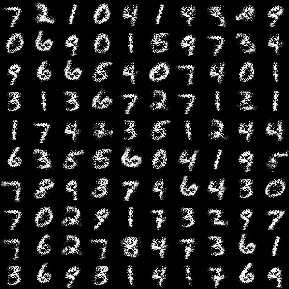

D17


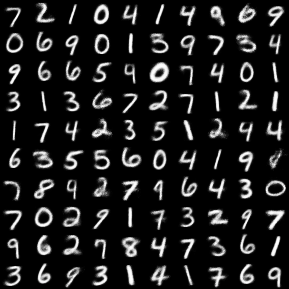

In [21]:
#model_folders = ['B17','B20']
for model_name in model_names:
    reconstructed = Image.fromarray(tile_raster_images(X=xhats[model_name],
                                                  img_shape=(28,28),
                                                  tile_shape=(10,10),
                                                  tile_spacing=(1,1)))
    reconstructed.save('/Users/vmisra/delete_me.png')
    print model_name
    I.display(I.Image('/Users/vmisra/delete_me.png'))